# Credit Risk Analysis

### Import packages and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Read the csv file

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Feature Descriptions

#### person_age: Age of the individual applying for the loan.
#### person_income: Annual income of the individual.
#### person_home_ownership: Type of home ownership of the individual.
    
- rent: The individual is currently renting a property.

- mortgage: The individual has a mortgage on the property they own.

- own: The individual owns their home outright.

- other: Other categories of home ownership that may be specific to the dataset.
    

#### person_emp_length: Employment length of the individual in years.
#### loan_intent: The intent behind the loan application.
#### loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
    
- A: The borrower has a high creditworthiness, indicating low risk.

- B: The borrower is relatively low-risk, but not as creditworthy as Grade A.

- C: The borrower's creditworthiness is moderate.

- D: The borrower is considered to have higher risk compared to previous grades.

- E: The borrower's creditworthiness is lower, indicating a higher risk.

- F: The borrower poses a significant credit risk.

- G: The borrower's creditworthiness is the lowest, signifying the highest risk.
    

#### loan_amnt: The loan amount requested by the individual.
#### loan_int_rate: The interest rate associated with the loan.
#### loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
    
- 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.

- 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
    

#### loan_percent_income: The percentage of income represented by the loan amount.
#### cb_person_default_on_file: Historical default of the individual as per credit bureau records.
    
- Y: The individual has a history of defaults on their credit file.

- N: The individual does not have any history of defaults.
    

#### cb_preson_cred_hist_length: The length of credit history for the individual.
- ##### Description source: https://www.kaggle.com/code/anshtanwar/credit-risk-prediction-training-and-eda

### Get some general information about the dataset
#### .info(), .describe() and .corr() functions
#### Distribution (.hist())

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.178899,0.165787,0.054172,0.011019,-0.023333,-0.041065,0.859544
person_income,0.178899,1.000000,0.136825,0.265879,-0.001381,-0.139938,-0.251511,0.117076
person_emp_length,0.165787,0.136825,1.000000,0.110759,-0.056405,-0.082638,-0.055167,0.146336
loan_amnt,0.054172,0.265879,0.110759,1.000000,0.145904,0.113550,0.577399,0.045294
loan_int_rate,0.011019,-0.001381,-0.056405,0.145904,1.000000,0.339350,0.123500,0.015371
loan_status,-0.023333,-0.139938,-0.082638,0.113550,0.339350,1.000000,0.379689,-0.015649
loan_percent_income,-0.041065,-0.251511,-0.055167,0.577399,0.123500,0.379689,1.000000,-0.030080
cb_person_cred_hist_length,0.859544,0.117076,0.146336,0.045294,0.015371,-0.015649,-0.030080,1.000000


<AxesSubplot:>

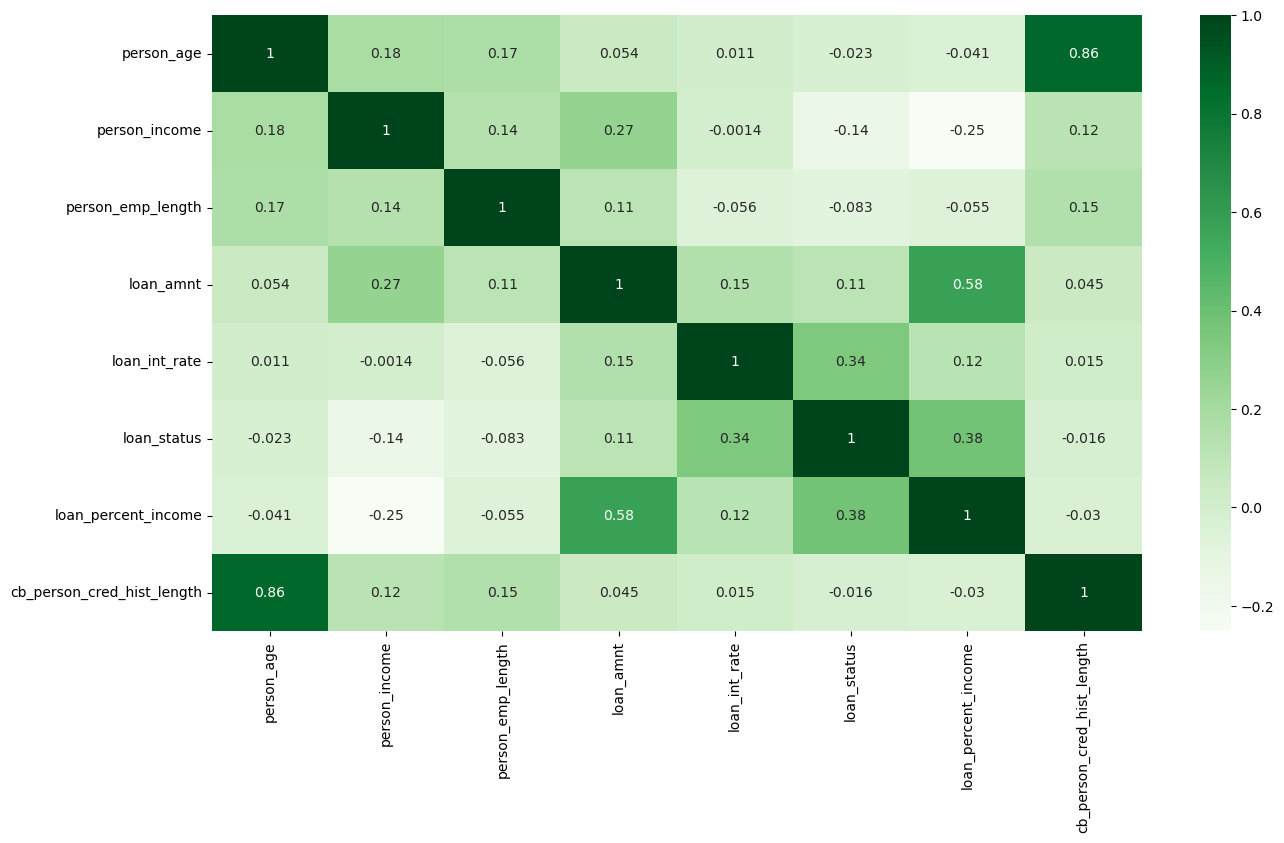

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True,cmap='Greens')

<AxesSubplot:>

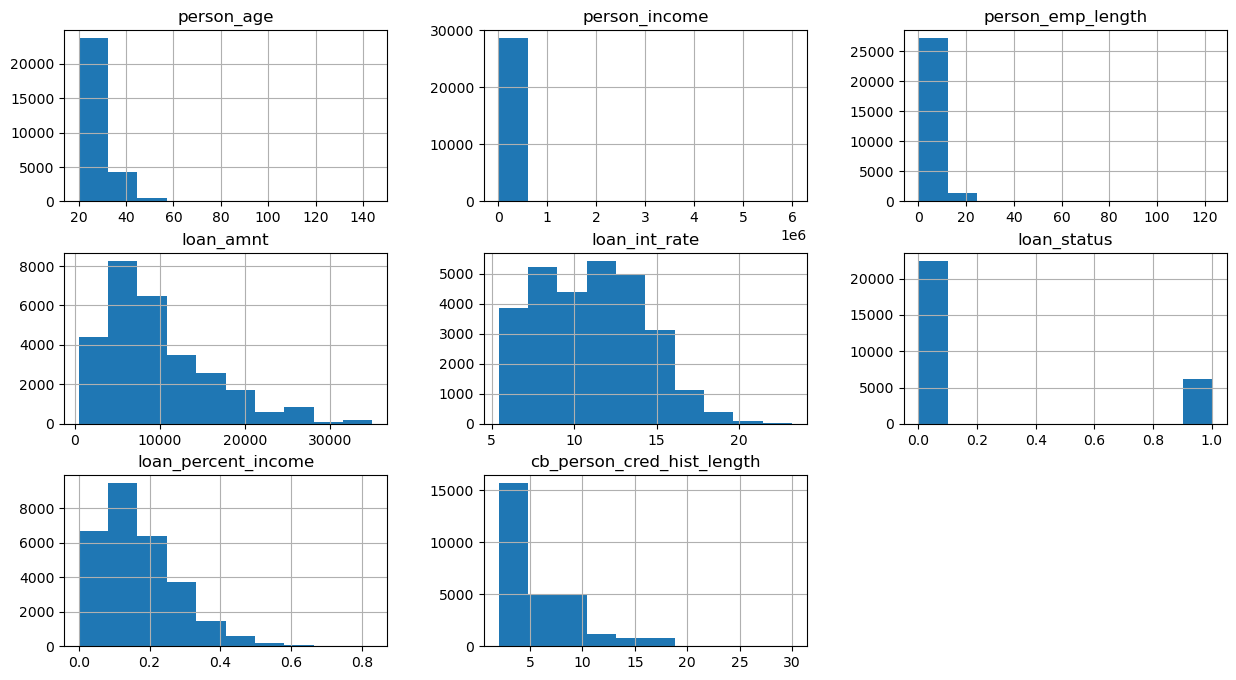

In [8]:
df.hist(figsize=(15,8), bins=10)
df.boxplot(figsize=(15,8))

In [9]:
df['cb_person_default_on_file'] = df.cb_person_default_on_file.apply(lambda x: 1 if x == 'Y' else 0)

#### Remove outliers

<AxesSubplot:>

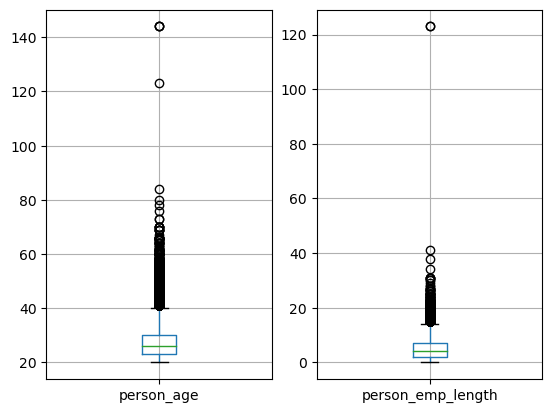

In [10]:
plt.subplot(121)
df.boxplot(column='person_age')
plt.subplot(122)
df.boxplot(column='person_emp_length')

In [11]:
df = df[df['person_age']<80]
df = df[df['person_emp_length']<=40]
df.reset_index(drop=True,inplace=True)

Text(0, 0.5, 'Employment Length')

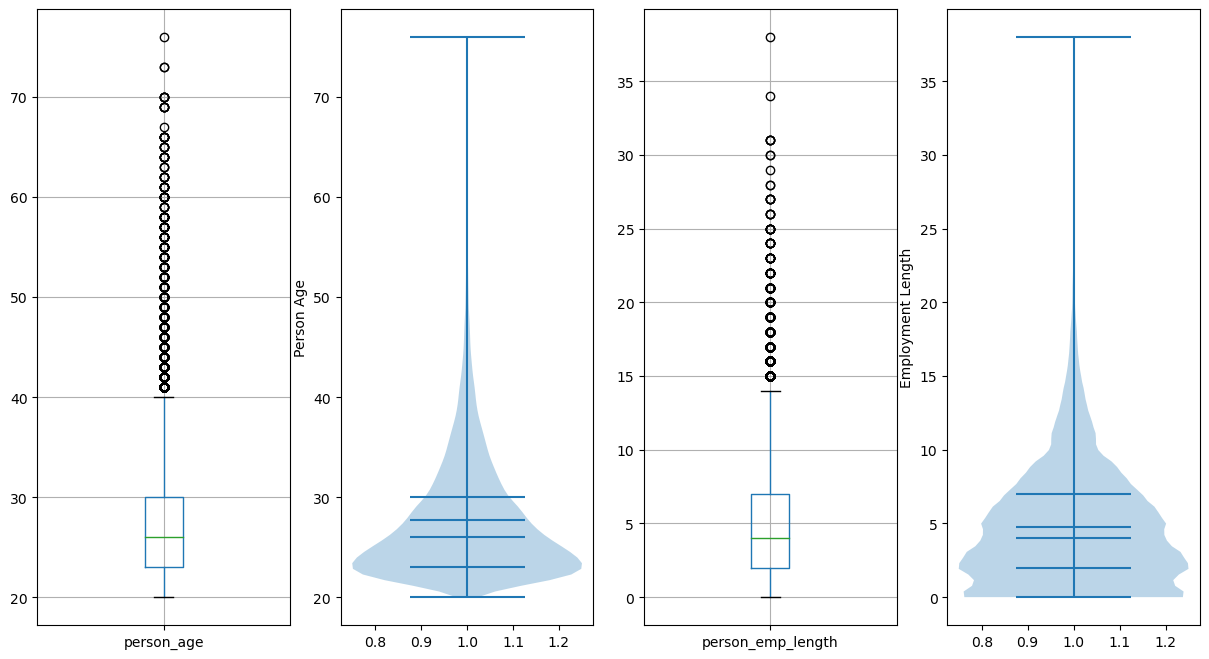

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(141)
df.boxplot(column='person_age')
plt.subplot(142)
plt.violinplot(df['person_age'],showmeans=True, quantiles=[0.25,0.5,0.75])
plt.ylabel('Person Age')
plt.subplot(143)
df.boxplot(column='person_emp_length')
plt.subplot(144)
plt.violinplot(df['person_emp_length'],showmeans=True, quantiles=[0.25,0.5,0.75])
plt.ylabel('Employment Length')

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_status'}>],
       [<AxesSubplot:title={'center':'loan_percent_income'}>,
        <AxesSubplot:title={'center':'cb_person_default_on_file'}>,
        <AxesSubplot:title={'center':'cb_person_cred_hist_length'}>]],
      dtype=object)

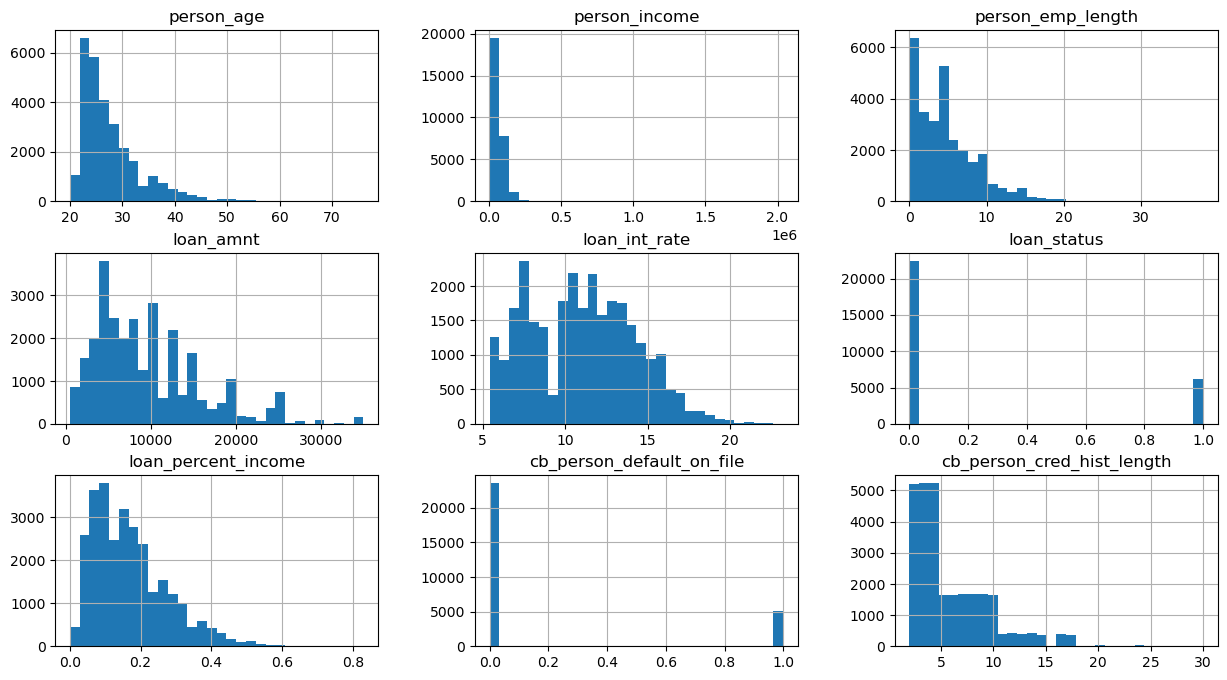

In [13]:
df.hist(figsize=(15,8), bins=30)

### Correlations
#### Plot the highest correlations with scatterplot

<AxesSubplot:>

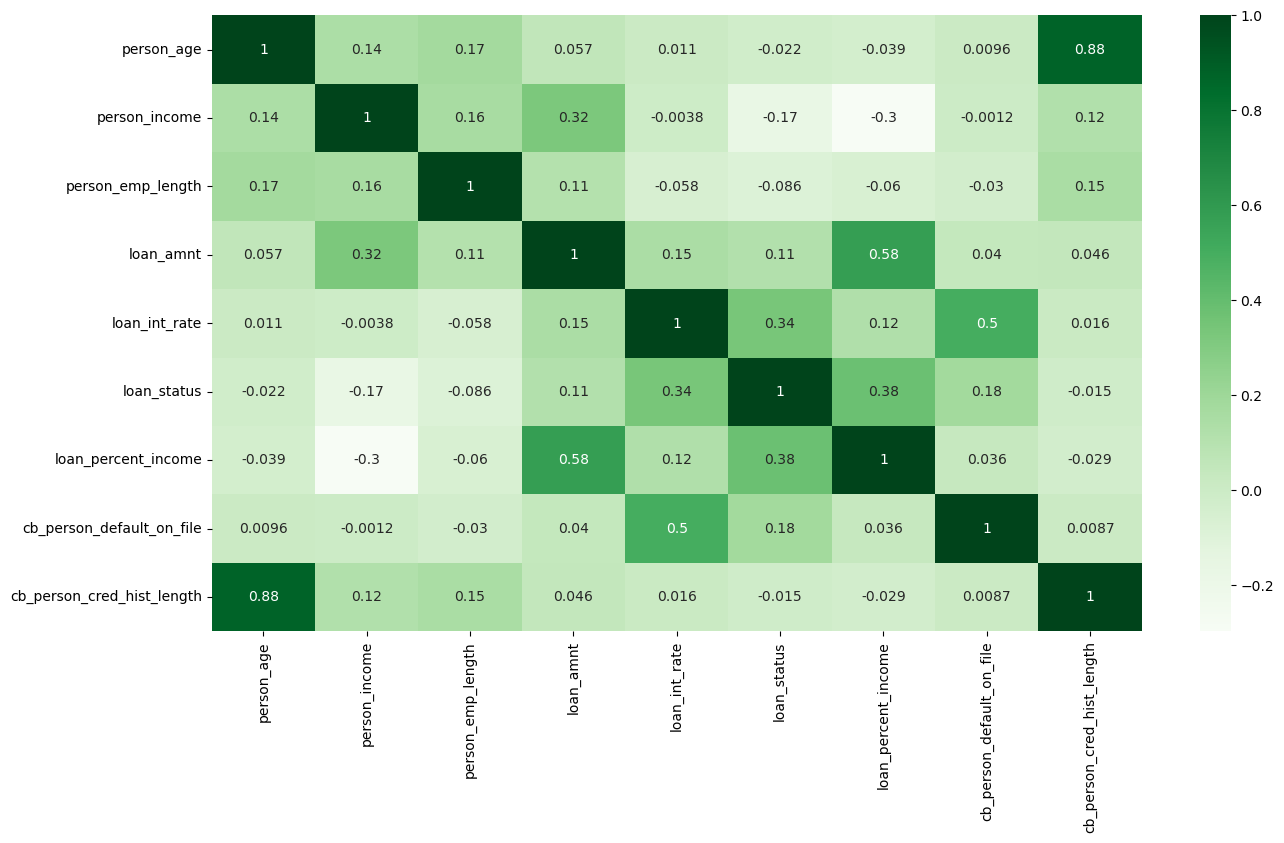

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True,cmap='Greens')

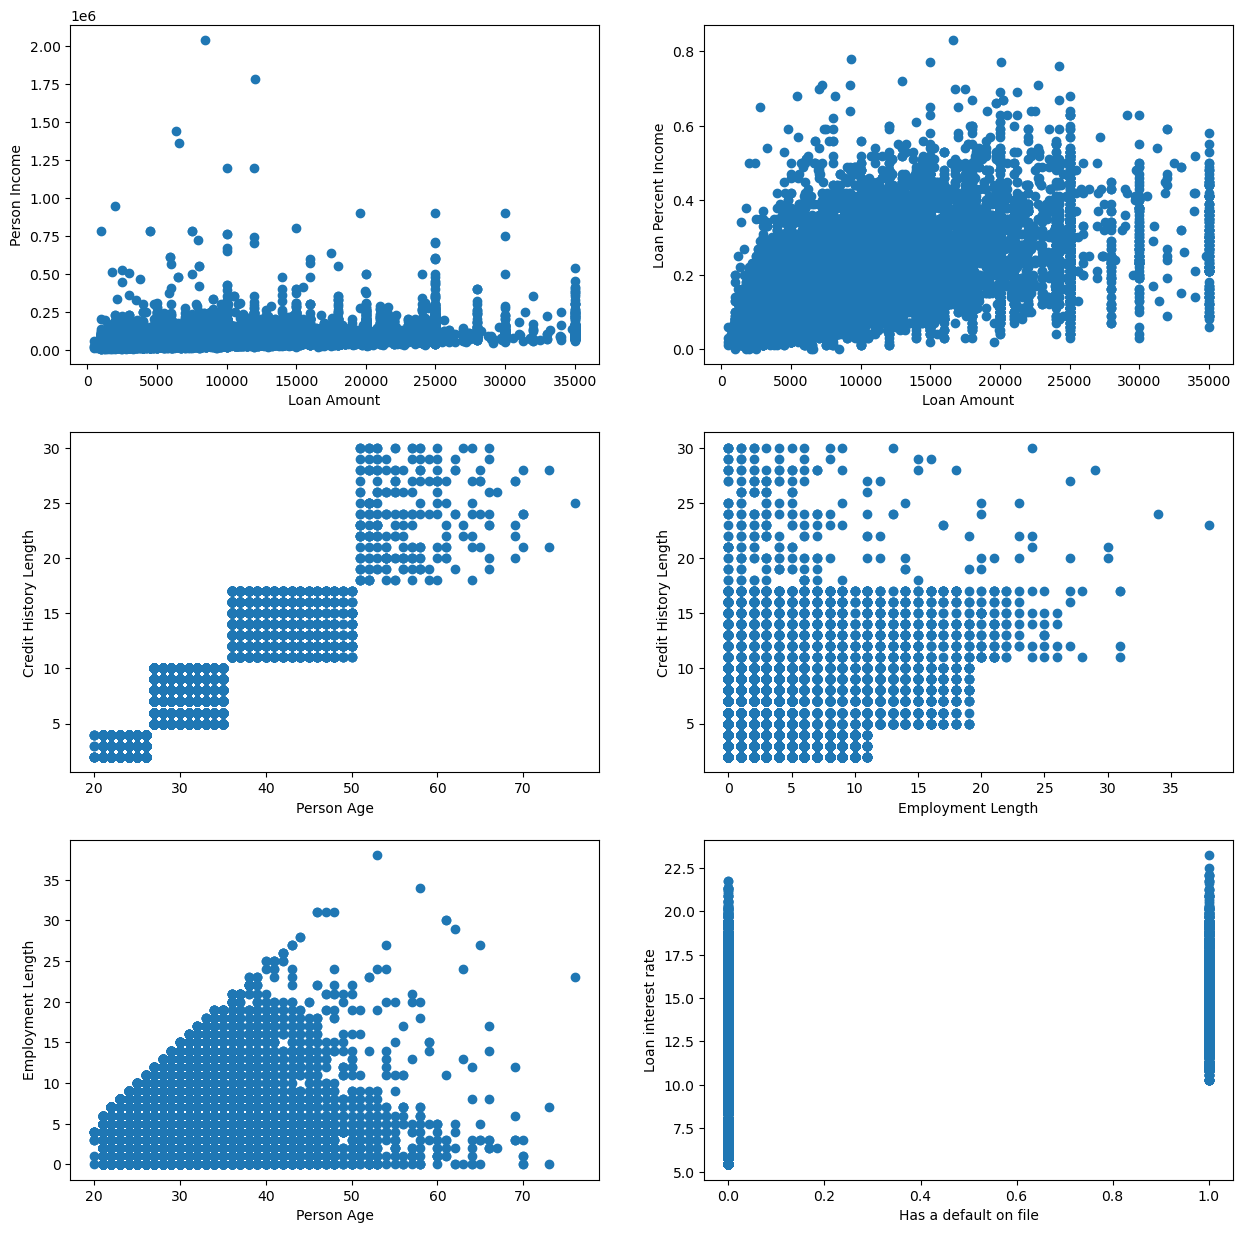

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.scatter(df.loan_amnt,df.person_income)
plt.xlabel('Loan Amount')
plt.ylabel('Person Income')

plt.subplot(322)
plt.scatter(df.loan_amnt,df.loan_percent_income)
plt.xlabel('Loan Amount')
plt.ylabel('Loan Percent Income')

plt.subplot(323)
plt.scatter(df.person_age,df.cb_person_cred_hist_length)
plt.ylabel('Credit History Length')
plt.xlabel('Person Age')

plt.subplot(324)
plt.scatter(df.person_emp_length,df.cb_person_cred_hist_length)
plt.ylabel('Credit History Length')
plt.xlabel('Employment Length')


plt.subplot(325)
plt.scatter(df.person_age, df.person_emp_length)
plt.xlabel('Person Age')
plt.ylabel('Employment Length')

plt.subplot(326)
plt.scatter(df.cb_person_default_on_file, df.loan_int_rate)
plt.xlabel('Has a default on file')
plt.ylabel('Loan interest rate')
plt.show()


#### People's credit history begins at age of 17-26
#### People with default on file have a higher loan interest rate in general

### Grouping numerical data for further analysis

In [16]:
df['person_home_ownership'].value_counts()

RENT        14546
MORTGAGE    11797
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [17]:
df.loan_intent.value_counts()

EDUCATION            5702
MEDICAL              5291
VENTURE              4999
PERSONAL             4874
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: loan_intent, dtype: int64

In [18]:
#df['person_age_group'] = df.person_age.apply(lambda x: '70-79' if x >= 70 else ('60-69' if x >= 60 else ('50-59' if x >=50 else ('40-49' if x >= 40 else ('30-39' if x >= 30 else ('20-29' if x >=20 else None))))))
df['Age_group'] = pd.cut(df['person_age'], bins=[20, 30, 40, 50, 60, 70,80],
                         labels=['20-29', '30-39', '40-49', '50-59', '60-69','70-79'])
df.Age_group.value_counts()

20-29    21796
30-39     5528
40-49     1045
50-59      195
60-69       48
70-79        3
Name: Age_group, dtype: int64

In [19]:
#df['loan_int_rate_group'] = df.loan_int_rate.apply(lambda x: '20-' if x >= 20 else ('17.5-20' if x >= 17.5 else ('15-17.5' if x >=15 else ('12.5-15' if x >= 12.5 else ('10-12.5' if x >= 10 else ('7.5-10' if x >=7.5 else ('5-7.5' if x >= 5 else None)))))))
df['loan_int_rate_group'] = pd.cut(df['loan_int_rate'],
                                  bins=[5,7.5, 10, 12.5, 15, 17.5, 20, float('inf')],
                                  labels=['5-7.5', '7.5-10', '10-12.5','12.5-15', '15-17.5', '17.5-20', '20-'])
df['loan_int_rate_group'].value_counts()

10-12.5    7343
12.5-15    6690
7.5-10     6244
5-7.5      4998
15-17.5    2744
17.5-20     537
20-          73
Name: loan_int_rate_group, dtype: int64

In [20]:
#df['loan_amnt_group'] = df.loan_amnt.apply(lambda x: '30000-' if x >= 30000 else ('25000-30000' if x >= 25000 else ('20000-25000' if x >=20000 else ('15000-20000' if x >= 15000 else ('10000-15000' if x >= 10000 else ('5000-10000' if x >= 5000 else ('0-5000' if x >= 0 else None)))))))
df['loan_amount_group'] = pd.cut(df['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['0-5000', '5000-10000', '10000-15000', '15000-35000'])
df['loan_amount_group'].value_counts()

5000-10000     10607
0-5000          8181
10000-15000     5430
15000-35000     4411
Name: loan_amount_group, dtype: int64

In [21]:
#df['person_income_group'] = df.person_income.apply(lambda x: '1,000,000 -' if x >= 1000000 else ('500,000 - 1,000,000' if x >= 500000 else ('100,000 - 500,000' if x >=100000 else ('50,000 - 100,000' if x >= 50000 else ('10,000 - 50,000' if x >= 10000 else ('5,000 - 10,000' if x >= 5000 else ('0 - 5,000' if x >= 0 else None)))))))
df['income_group'] = pd.cut(df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-'])
df['income_group'].value_counts()

25000-50000     10197
50000-75000      8530
75000-100000     4197
100000-          3733
0-25000          1972
Name: income_group, dtype: int64

In [22]:
df['loan_percent_income_group'] = pd.cut(df['loan_percent_income'],
                                  bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 1],
                                  labels=['0-10%', '10-20%', '20-30%','30-40%', '40-50%', '50-60%', '60-70%','70-80%','80%-'])
df['loan_percent_income_group'].value_counts()

10-20%    10621
0-10%      9255
20-30%     5440
30-40%     2346
40-50%      743
50-60%      172
60-70%       36
70-80%        8
80%-          1
Name: loan_percent_income_group, dtype: int64

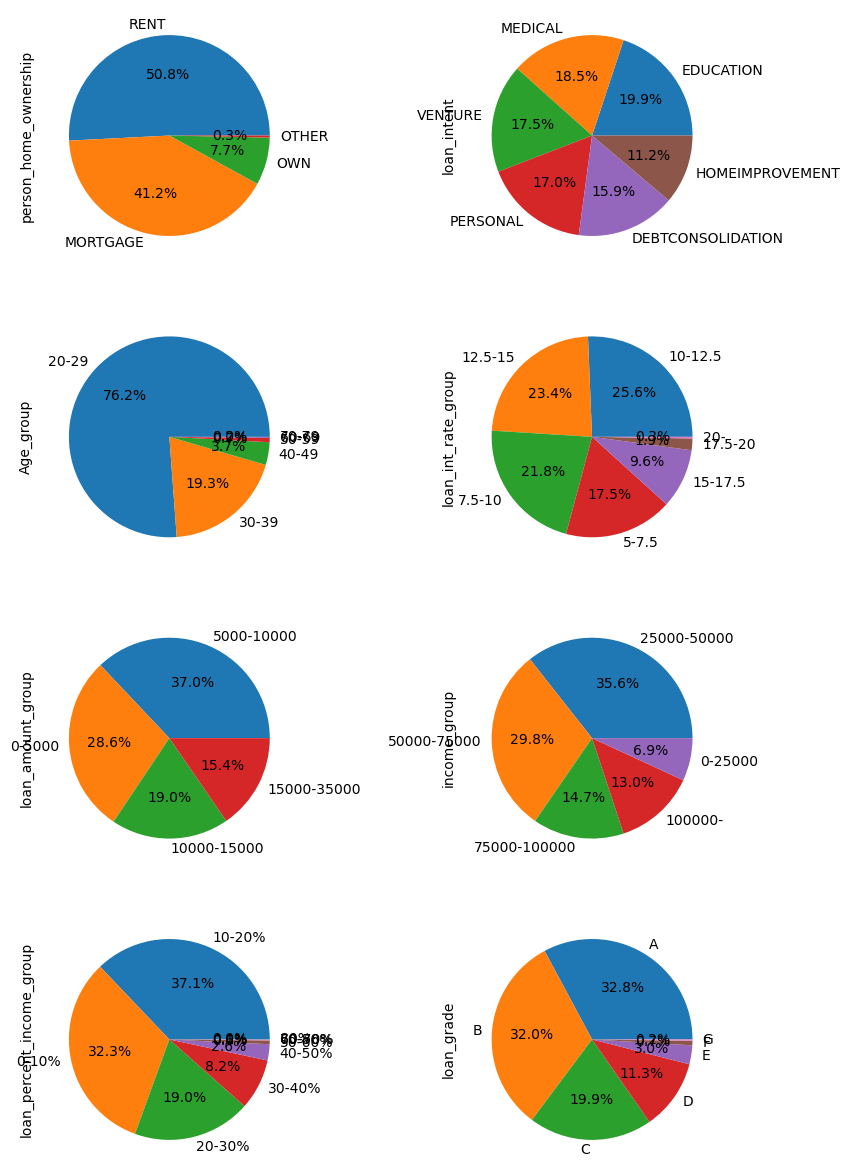

In [23]:
plt.figure(figsize=(10,15))
plt.subplot(421)
df['person_home_ownership'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(422)
df.loan_intent.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(423)
df.Age_group.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(424)
df['loan_int_rate_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(425)
df['loan_amount_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(426)
df['income_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(427)
df['loan_percent_income_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(428)
df.loan_grade.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

 - Most of the customers (50.8%) live in a rented property or have a mortgage on the property what they live in (41.2%). Just the 7.7% of the customers own their home.
 - Most of the customers' age is between 20 and 39 (95.5%). (It is a good explonation for the dsitribution of the ownerships.)
 - Most common loan amounts are between 0 and 10,000 (65.6%).
 - Most customers' income is in the range of 25,000 - 50,000 (35.6%). The smallest income group is <25,000 (~7%).
 - Most of the customers' annual income doesn't reach the 20% of the loan amount (69.4%).
 - Despite of that, more than the half of the loans are graded A or B (64.8%).

In [24]:
df[['cb_person_default_on_file','loan_status']].groupby(['loan_status','cb_person_default_on_file']).value_counts()

loan_status  cb_person_default_on_file
0            0                            19251
             1                             3176
1            0                             4276
             1                             1926
dtype: int64

### Analysis 
#### With pivot tables, cross tabulations, heatmaps and stacked charts

#### Conclusions:
- #### Pivot Table 1:
 - Customer with a default on file means a higher risk.
- #### Pivot Table 3 & 7:
 - As we can see, the interest rates and loan grades are well determined. Higher interest rate or worse loan grade means higher chance for a default loan status.
- #### Pivot Table 4:
 - People's loan status more likely be default with lower income. (0-25K (51.4%); 25-50K (~28%))
 - As the income grows the chance for a default loan status decrease.
- #### Pivot Table 5:
 - Interestingly, people with higher income/loan amount ratio, more likely have a default loan status.
 - (Note: There are very few customer with a higher (>40%) income/loan amount ratio, so the representativeness of this tendency/data is not the best (Not representative).)
- #### Pivot Table 6:
 - A higher loan amount means a higher chance for a default loan status. (10-15K (23%); 15-35K (~32.6%))

In [25]:
df.corr()[['loan_status']].abs().sort_values(by='loan_status', ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.379511
loan_int_rate,0.339290
cb_person_default_on_file,0.181846
person_income,0.167029
loan_amnt,0.113340
person_emp_length,0.086448
person_age,0.022111
cb_person_cred_hist_length,0.015335


In [26]:
pivot_1 = pd.pivot_table(df,index = 'cb_person_default_on_file',columns = ['loan_status'], aggfunc={"loan_status":"count"})
pivot_1

loan_status      
loan_status                         0     1
cb_person_default_on_file                  
0                               19251  4276
1                                3176  1926

In [27]:
cross_tab_1 = pd.crosstab(index=df['cb_person_default_on_file'], columns=df['loan_status'],normalize="index")
cross_tab_1

loan_status,0,1
cb_person_default_on_file,,
0,0.818251,0.181749
1,0.622501,0.377499


In [28]:
def plot(cross_tab, x_loc, size):
    cross_tab.plot(kind='bar', stacked=True)
    plt.legend(loc="upper left", ncol=2)
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab.loc[x],
                                          cross_tab.loc[x].cumsum()):
                
            plt.text(x=n - x_loc,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=size,
                     fontweight="bold")

    plt.show()

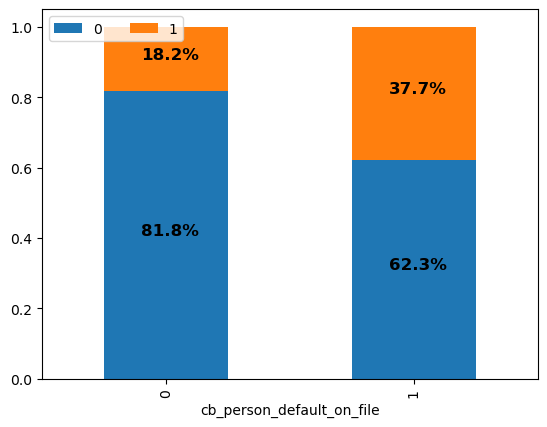

In [29]:
plot(cross_tab_1,0.1,12)

<AxesSubplot:xlabel='loan_status', ylabel='cb_person_default_on_file'>

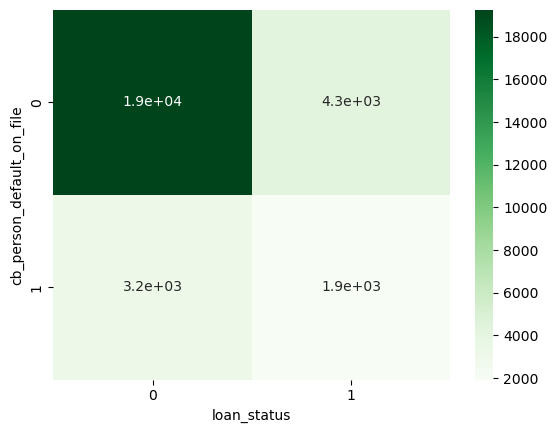

In [30]:
plt.figure()
sns.heatmap(pivot_1.loan_status, annot=True, cmap='Greens')

In [31]:
pivot_2 = pd.pivot_table(df,index='loan_intent',columns = ['loan_status'], aggfunc={"loan_status":"count"})
pivot_2

loan_status      
loan_status                 0     1
loan_intent                        
DEBTCONSOLIDATION        3269  1296
EDUCATION                4731   971
HOMEIMPROVEMENT          2377   821
MEDICAL                  3870  1421
PERSONAL                 3912   962
VENTURE                  4268   731

In [32]:
cross_tab_2 = pd.crosstab(index=df['loan_intent'], columns=df['loan_status'],normalize="index")
cross_tab_2

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.716101,0.283899
EDUCATION,0.829709,0.170291
HOMEIMPROVEMENT,0.743277,0.256723
MEDICAL,0.731431,0.268569
PERSONAL,0.802626,0.197374
VENTURE,0.853771,0.146229


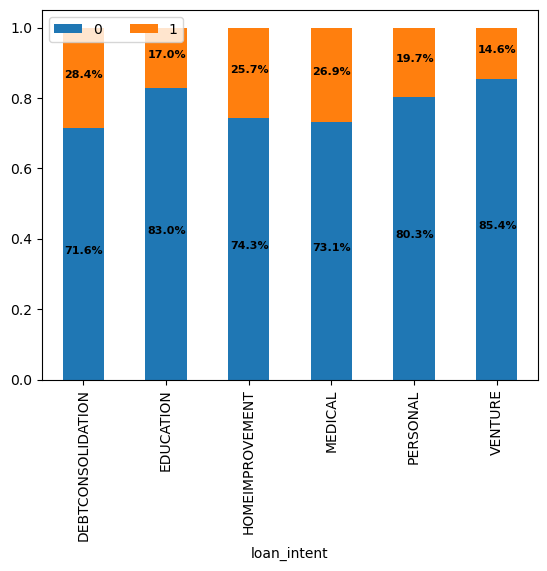

In [33]:
plot(cross_tab_2,0.225,8)

<AxesSubplot:xlabel='loan_status', ylabel='loan_intent'>

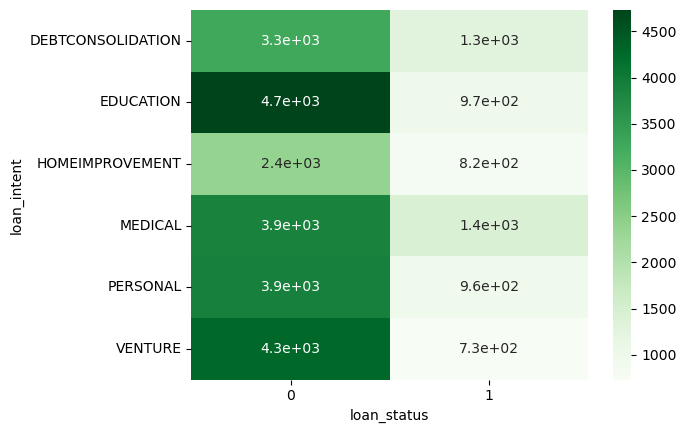

In [34]:
plt.figure()
sns.heatmap(pivot_2.loan_status, annot=True, cmap='Greens')

In [35]:
pivot_3 = pd.pivot_table(df,index='loan_int_rate_group',columns = ['loan_status'], aggfunc={"loan_status":"count"})
pivot_3

loan_status      
loan_status                   0     1
loan_int_rate_group                  
5-7.5                      4608   390
7.5-10                     5457   787
10-12.5                    6104  1239
12.5-15                    4848  1842
15-17.5                    1210  1534
17.5-20                     190   347
20-                          10    63

In [36]:
cross_tab_3 = pd.crosstab(index=df['loan_int_rate_group'], columns=df['loan_status'],normalize="index")
cross_tab_3

loan_status,0,1
loan_int_rate_group,,
5-7.5,0.921969,0.078031
7.5-10,0.873959,0.126041
10-12.5,0.831268,0.168732
12.5-15,0.724664,0.275336
15-17.5,0.440962,0.559038
17.5-20,0.353818,0.646182
20-,0.136986,0.863014


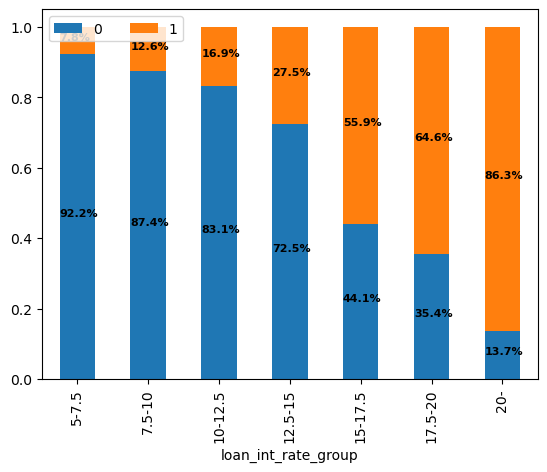

In [37]:
plot(cross_tab_3,0.25,8)

<AxesSubplot:xlabel='loan_status', ylabel='loan_int_rate_group'>

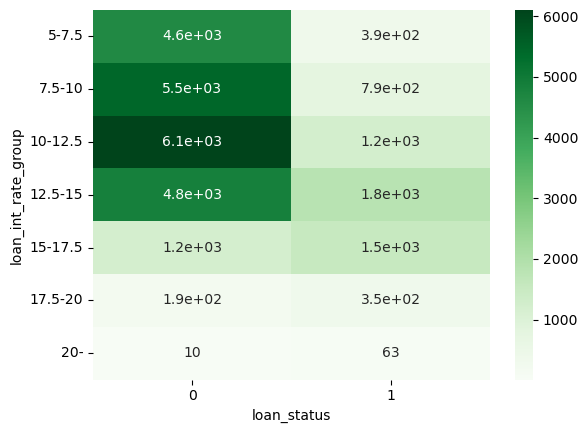

In [38]:
plt.figure()
sns.heatmap(pivot_3.loan_status, annot=True, cmap="Greens")

In [39]:
pivot_4 = pd.pivot_table(df,index='income_group',columns = ['loan_status'], aggfunc={"loan_status":"count"})
pivot_4

loan_status      
loan_status            0     1
income_group                  
0-25000              958  1014
25000-50000         7346  2851
50000-75000         7020  1510
75000-100000        3735   462
100000-             3368   365

In [40]:
cross_tab_4 = pd.crosstab(index=df['income_group'], columns=df['loan_status'],normalize="index")
cross_tab_4

loan_status,0,1
income_group,,
0-25000,0.485801,0.514199
25000-50000,0.720408,0.279592
50000-75000,0.822978,0.177022
75000-100000,0.889921,0.110079
100000-,0.902223,0.097777


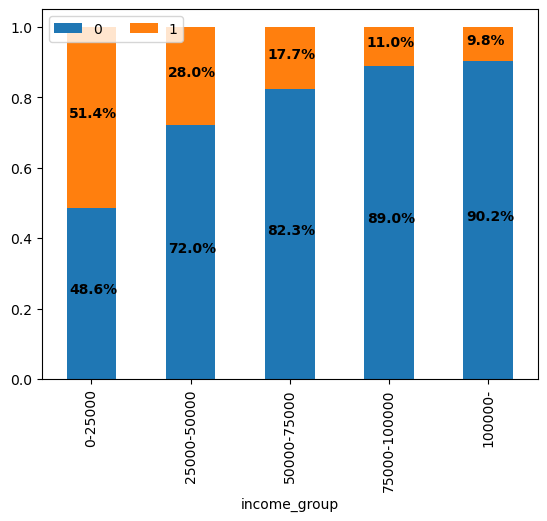

In [41]:
plot(cross_tab_4,0.225,10)

<AxesSubplot:xlabel='loan_status', ylabel='income_group'>

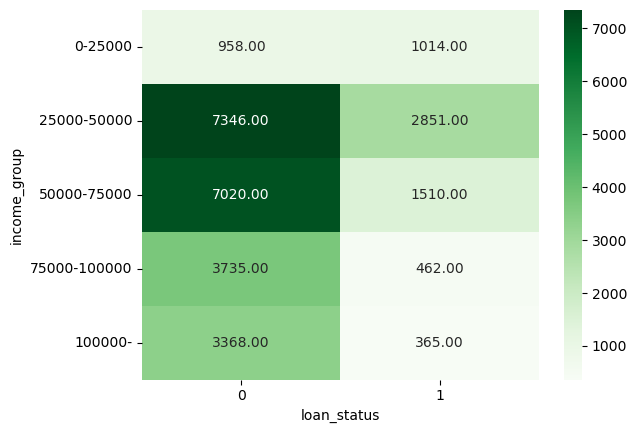

In [42]:
plt.figure()
sns.heatmap(pivot_4.loan_status, annot=True,cmap="Greens", fmt=".2f")

In [43]:
pivot_5 = pd.pivot_table(df,index='loan_percent_income_group', columns=['loan_status'], aggfunc={"loan_status":"count"})
pivot_5

loan_status      
loan_status                         0     1
loan_percent_income_group                  
0-10%                            8159  1096
10-20%                           9043  1578
20-30%                           4257  1183
30-40%                            726  1620
40-50%                            191   552
50-60%                             34   138
60-70%                              8    28
70-80%                              1     7
80%-                                1     0

In [44]:
cross_tab_5 = pd.crosstab(index=df['loan_percent_income_group'], columns=df['loan_status'],normalize="index")
cross_tab_5

loan_status,0,1
loan_percent_income_group,,
0-10%,0.881578,0.118422
10-20%,0.851426,0.148574
20-30%,0.782537,0.217463
30-40%,0.309463,0.690537
40-50%,0.257066,0.742934
50-60%,0.197674,0.802326
60-70%,0.222222,0.777778
70-80%,0.125000,0.875000
80%-,1.000000,0.000000


<AxesSubplot:xlabel='loan_status', ylabel='loan_percent_income_group'>

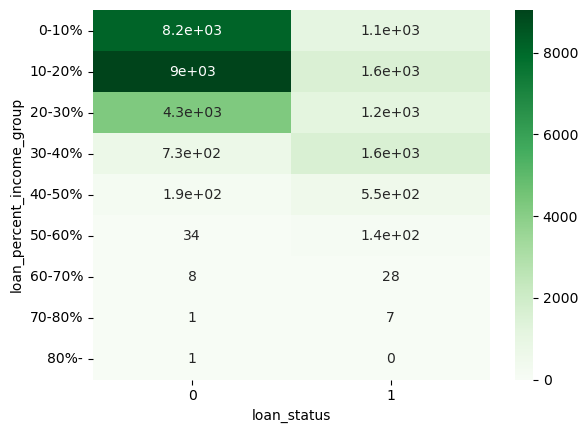

In [45]:
plt.figure()
sns.heatmap(pivot_5.loan_status, annot=True, cmap="Greens")

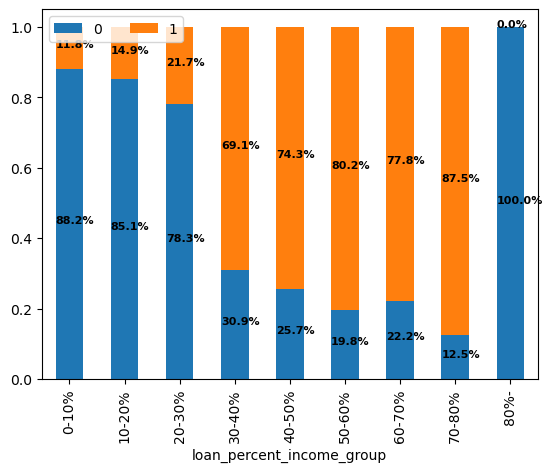

In [46]:
plot(cross_tab_5,0.25,8)

In [47]:
pivot_6 = pd.pivot_table(df,index='loan_amount_group', columns=['loan_status'], aggfunc={"loan_status":"count"})
pivot_6

loan_status      
loan_status                 0     1
loan_amount_group                  
0-5000                   6559  1622
5000-10000               8716  1891
10000-15000              4180  1250
15000-35000              2972  1439

In [48]:
cross_tab_6 = pd.crosstab(index=df['loan_amount_group'], columns=df['loan_status'],normalize="index")
cross_tab_6

loan_status,0,1
loan_amount_group,,
0-5000,0.801736,0.198264
5000-10000,0.821722,0.178278
10000-15000,0.769797,0.230203
15000-35000,0.673770,0.326230


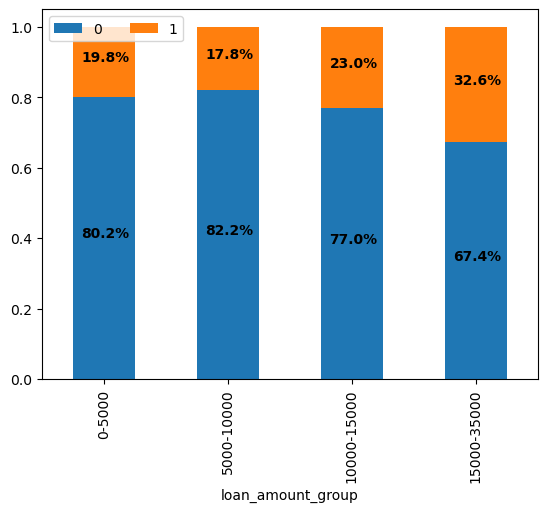

In [49]:
plot(cross_tab_6,0.18,10)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amount_group'>

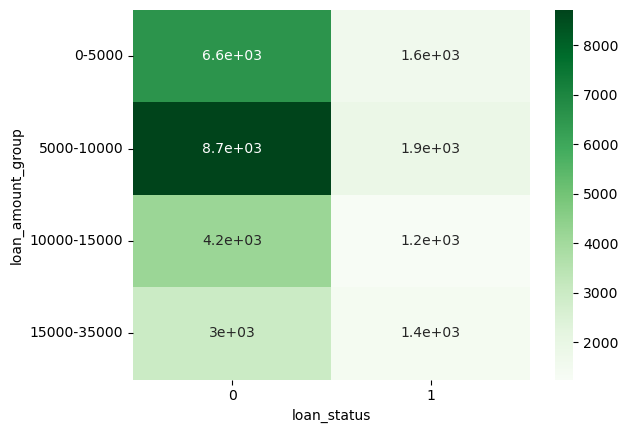

In [50]:
plt.figure()
sns.heatmap(pivot_6.loan_status, annot=True, cmap="Greens")

In [51]:
pivot_7 = pd.pivot_table(df,index='loan_grade', columns=['loan_status'], aggfunc={"loan_status":"count"})
pivot_7

loan_status      
loan_status           0     1
loan_grade                   
A                  8495   904
B                  7695  1453
C                  4540  1157
D                  1325  1922
E                   308   562
F                    63   146
G                     1    58

<AxesSubplot:xlabel='loan_status', ylabel='loan_grade'>

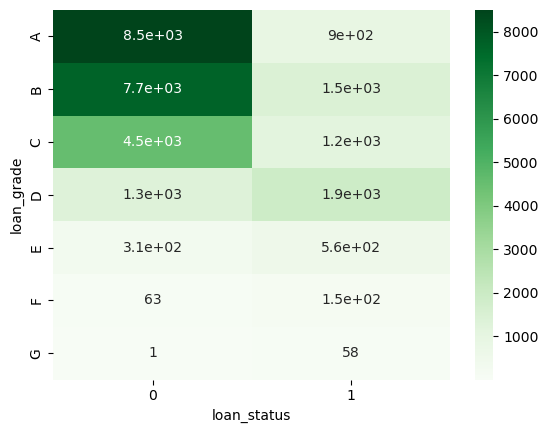

In [52]:
plt.figure()
sns.heatmap(pivot_7.loan_status, annot=True, cmap="Greens")

In [53]:
cross_tab_7 = pd.crosstab(index=df['loan_grade'], columns=df['loan_status'],normalize="index")
cross_tab_7

loan_status,0,1
loan_grade,,
A,0.903820,0.096180
B,0.841167,0.158833
C,0.796911,0.203089
D,0.408069,0.591931
E,0.354023,0.645977
F,0.301435,0.698565
G,0.016949,0.983051


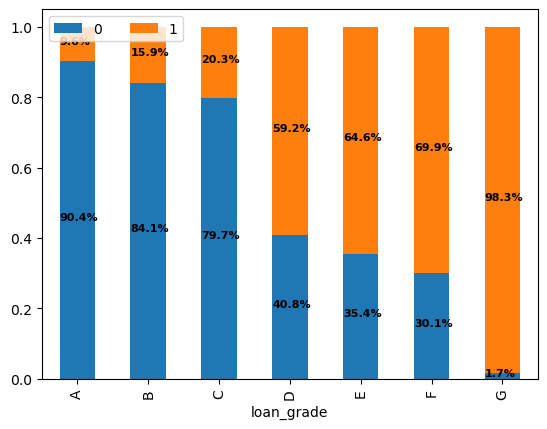

In [54]:
plot(cross_tab_7,0.25,8)

In [55]:
df_dummies = pd.get_dummies(df)

<AxesSubplot:>

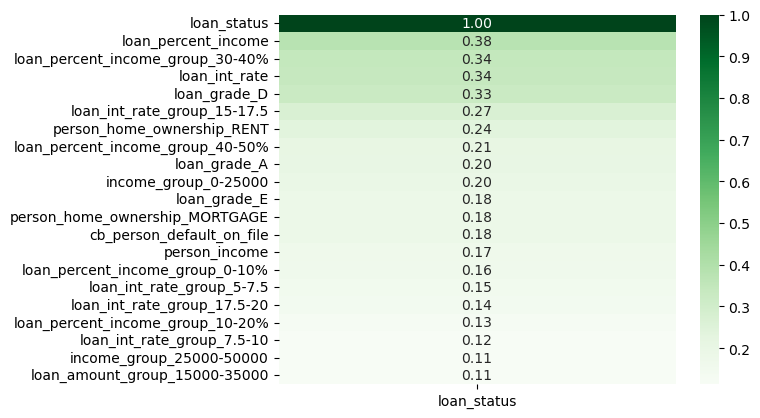

In [56]:
sns.heatmap(df_dummies.corr()[['loan_status']].abs().sort_values(by='loan_status', ascending=False)[:21],annot=True, cmap='Greens', fmt='.2f')

# Model building

In [57]:
X = df_dummies.drop(['loan_status'], axis=1)
y = df_dummies['loan_status']

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic = LogisticRegression()
forest = RandomForestClassifier(n_estimators=200,min_samples_split = 8, random_state=1)
gboost = GradientBoostingClassifier(n_estimators=200,min_samples_split = 8, random_state=1)

logistic.fit(X_train, y_train)
forest.fit(X_train, y_train)
gboost.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_split=8, n_estimators=200,
                           random_state=1)

In [59]:
logistic_predictions = logistic.predict(X_test)
logistic_df = pd.DataFrame()
logistic_df['Predictions'] = logistic_predictions
logistic_df['Real'] = y_test

logistic_df.fillna(0,inplace=True)
logistic_df['Result'] = logistic_df.apply(lambda x: 1 if x['Predictions'] == x['Real'] else 0, axis=1)
logistic_df.Result.value_counts()

1    5153
0     573
Name: Result, dtype: int64

In [60]:
forest_predictions = forest.predict(X_test)
forest_df = pd.DataFrame()
forest_df['Predictions'] = forest_predictions
forest_df['Real'] = y_test

forest_df.fillna(0,inplace=True)
forest_df['Result'] = forest_df.apply(lambda x: 1 if x['Predictions'] == x['Real'] else 0, axis=1)
forest_df.Result.value_counts()

1    4624
0    1102
Name: Result, dtype: int64

In [61]:
gboost_predictions = gboost.predict(X_test)
gboost_df = pd.DataFrame()
gboost_df['Predictions'] = gboost_predictions
gboost_df['Real'] = y_test

gboost_df.fillna(0,inplace=True)
gboost_df['Result'] = gboost_df.apply(lambda x: 1 if x['Predictions'] == x['Real'] else 0, axis=1)
gboost_df.Result.value_counts()

1    4602
0    1124
Name: Result, dtype: int64

#### The best model is the simple Logistic Regression with an accuracy of ~90%. (Random Forest; Gradientboost: ~80%)